## Polynomial Regression


<br> The polynomial regression model: 

<br>

### $$y_{i}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}{x_{i}}^{2}+\ldots +\beta _{m}{x_{i}}^{m}+\varepsilon _{i}$$

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3).fit_transform(x[:, None])
poly

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [4]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

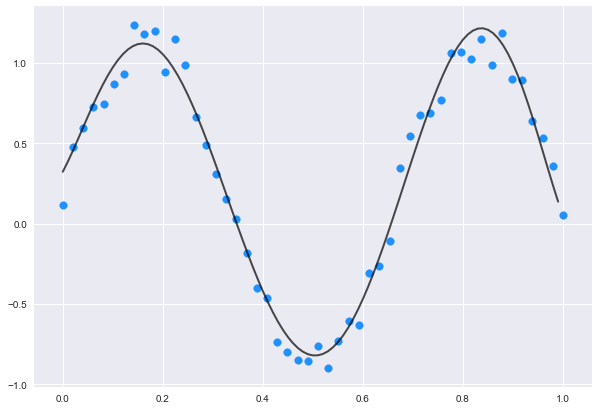

In [5]:
rng = np.random.RandomState(42) 
x = np.linspace(0,1,50)
f = lambda x : np.sin(3*np.pi*x) + rng.rand(50)*0.3
plt.figure(figsize=(10,7))
plt.scatter(x, f(x), c='dodgerblue', s=60)

# polynomial regression
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
x_test = np.arange(x.min(), x.max(), 0.01)
poly_model.fit(x[:, np.newaxis], f(x))
y_pred = poly_model.predict(x_test[:, np.newaxis])

plt.plot(x_test, y_pred, c='k', linewidth=2, alpha=0.7)

##  Polynomial Regression - the overfitting problem


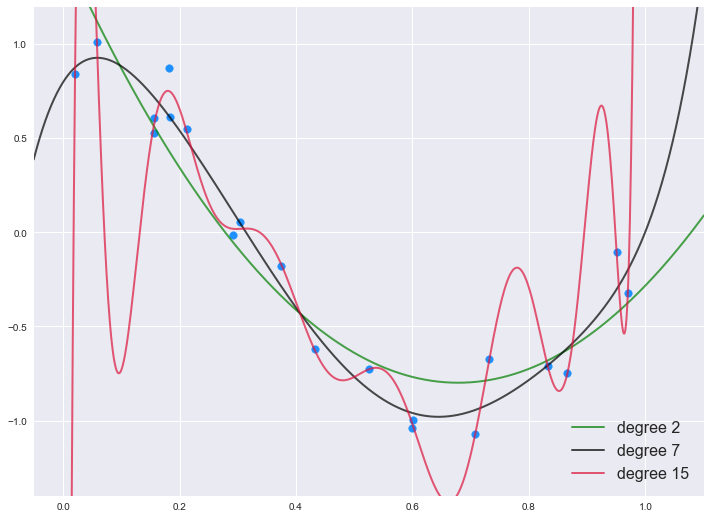

In [6]:
rng = np.random.RandomState(42) 
x = np.sort(rng.rand(20))
f = lambda x: np.cos(1.5*np.pi*x) 

y_noise = f(x) + rng.randn(20)*0.15
plt.figure(figsize=(12,9))
plt.scatter(x, y_noise, c='dodgerblue', s=60)
colors = ['green', 'k', 'crimson']
degrees = [2, 7, 15]

for degree, color in zip(degrees, colors):
    poly_model = make_pipeline(PolynomialFeatures(degree),
                                   LinearRegression())

    x_test = np.arange(x.min()-0.5, x.max()+0.5, 0.001)
    poly_model.fit(x[:, np.newaxis], y_noise)
    y_pred = poly_model.predict(x_test[:, np.newaxis])

    plt.plot(x_test, y_pred, label='degree {}'.format(degree), c=color, alpha=0.7, linewidth=2)
    plt.ylim((-1.4, 1.2))
    plt.xlim((-0.05, 1.1))
    plt.legend(loc="best", prop={'size': 16})

##  Ridge Regression ($L_{2}$ Regularization)

### $$\mathcal{penalty} = \alpha \sum_{j=1}^{k} {\theta_{j}}^{2}$$ 

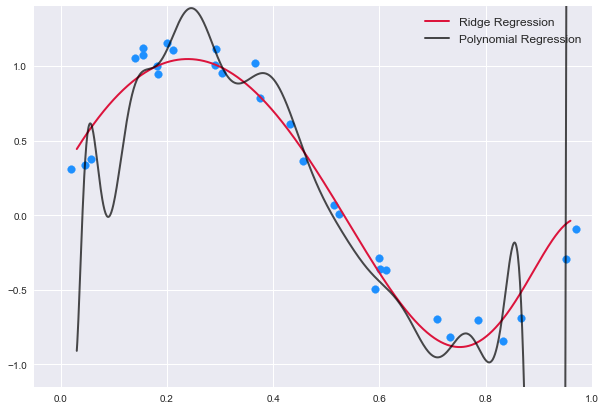

In [7]:
from sklearn.linear_model import Ridge

rng = np.random.RandomState(42) 
x = np.sort(rng.rand(30))
f = lambda x : np.sin(2*np.pi*x) + rng.rand(30)*0.3
plt.figure(figsize=(10,7))
plt.scatter(x, f(x), c='dodgerblue', s=60)

# polynomial regression
poly_model = make_pipeline(PolynomialFeatures(20),
                           LinearRegression())
reg_model = make_pipeline(PolynomialFeatures(20),
                           Ridge(alpha=0.001))
x_test = np.arange(x.min()+0.01, x.max()-0.01, 0.001)
poly_model.fit(x[:, np.newaxis], f(x))
reg_model.fit(x[:, np.newaxis], f(x))
y_pred_reg = reg_model.predict(x_test[:, np.newaxis])
y_pred = poly_model.predict(x_test[:, np.newaxis])

plt.plot(x_test, y_pred_reg, c='crimson', linewidth=2, label="Ridge Regression")
plt.plot(x_test, y_pred, c='k', linewidth=2, alpha=0.7, label="Polynomial Regression")
plt.ylim((-1.15, 1.4))
plt.xlim((-0.05, 1))
plt.legend(loc="upper right", prop={'size': 12})

In [8]:
alphas = [1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3]
coefs = []

for alpha in alphas:
    reg_model = make_pipeline(PolynomialFeatures(30),
                               Ridge(alpha=alpha))

    x_test = np.arange(x.min(), x.max(), 0.001)
    reg_model.fit(x[:, np.newaxis], f(x))
    y_pred_reg = reg_model.predict(x_test[:, np.newaxis])
    coefs.append(reg_model.named_steps['ridge'].coef_)

# coefficent vector magnitudes for each paratmeter setting of alpha
coef_mags = [np.linalg.norm(coef) for coef in coefs]

Text(0.5, 1.0, 'Effect of L_2 Regularization on Coefficient Weights')

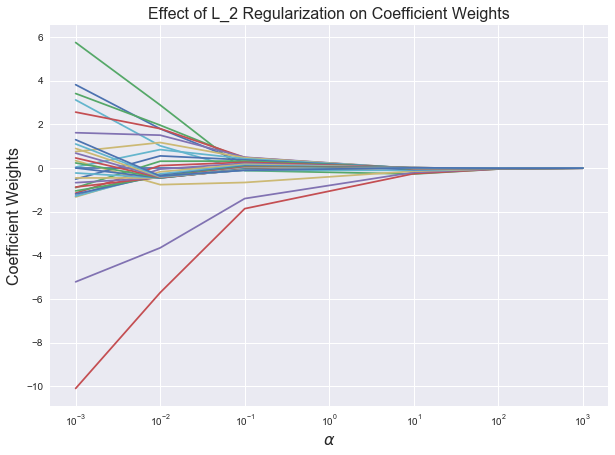

In [9]:
coef_weights = np.vstack((coefs))
fig, ax = plt.subplots(figsize=(10,7))

for i in range(coef_weights.shape[1]):
    ax.plot(alphas, coef_weights[:,i])
ax.set_xscale('log')
ax.set_xlabel(r"$\alpha$", fontsize=16)
ax.set_ylabel("Coefficient Weights", fontsize=16)
ax.set_title('Effect of L_2 Regularization on Coefficient Weights', fontsize=16)

## Lasso Regression ($L_{1}$ Regularization) 

### $$\mathcal{penalty} = \alpha \sum_{j=1}^{k} \left | \theta_{j} \right |$$ 

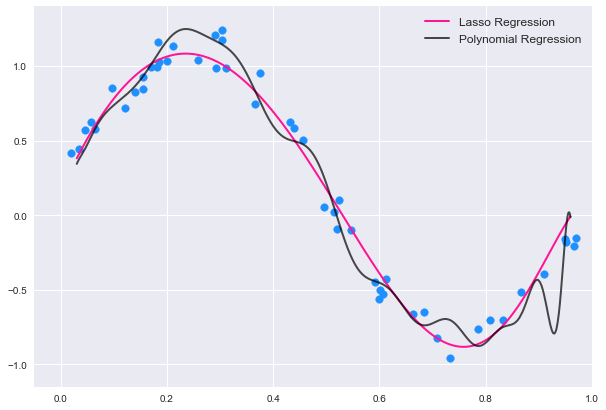

In [10]:
from sklearn.linear_model import Lasso

rng = np.random.RandomState(42) 
x = np.sort(rng.rand(50))
f = lambda x : np.sin(2*np.pi*x) + rng.rand(50)*0.3
plt.figure(figsize=(10,7))
plt.scatter(x, f(x), c='dodgerblue', s=60)

# polynomial regression
poly_model = make_pipeline(PolynomialFeatures(30),
                           LinearRegression())
reg_model = make_pipeline(PolynomialFeatures(30),
                           Lasso(alpha=0.0001, max_iter=100000))
x_test = np.arange(x.min()+0.01, x.max()-0.01, 0.001)
poly_model.fit(x[:, np.newaxis], f(x))
reg_model.fit(x[:, np.newaxis], f(x))
y_pred_reg = reg_model.predict(x_test[:, np.newaxis])
y_pred = poly_model.predict(x_test[:, np.newaxis])

plt.plot(x_test, y_pred_reg, c='deeppink', linewidth=2, label="Lasso Regression")
plt.plot(x_test, y_pred, c='k', linewidth=2, alpha=0.7, label="Polynomial Regression")
plt.ylim((-1.15, 1.4))
plt.xlim((-0.05, 1))
plt.legend(loc="upper right", prop={'size': 12})

In [11]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3]
coefs = []

for alpha in alphas:
    L1reg_model = make_pipeline(PolynomialFeatures(30),
                               Lasso(alpha=alpha, max_iter=100000))

    x_test = np.arange(x.min(), x.max(), 0.001)
    L1reg_model.fit(x[:, np.newaxis], f(x))
    y_pred_reg = L1reg_model.predict(x_test[:, np.newaxis])
    coefs.append(L1reg_model.named_steps['lasso'].coef_)

Text(0.5, 1.0, 'Effect of L_1 Regularization on Coefficient Weights (and Feature Selection!)')

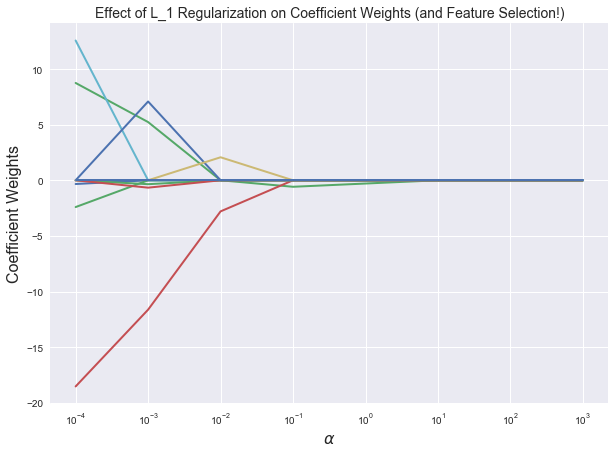

In [12]:
coef_weights = np.vstack((coefs))
fig, ax = plt.subplots(figsize=(10,7))

for i in range(coef_weights.shape[1]):
    ax.plot(alphas, coef_weights[:,i], linewidth=2)
ax.set_xscale('log')
ax.set_xlabel(r"$\alpha$", fontsize=16)
ax.set_ylabel("Coefficient Weights", fontsize=16)
ax.set_title('Effect of L_1 Regularization on Coefficient Weights (and Feature Selection!)', fontsize=14)